In [20]:
import numpy as np
import pandas as pd
from keras import utils # utils.to_categorical 원핫인코딩
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix # 혼동행렬
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # 데이터 분리
from keras.utils import to_categorical

# 분류분석
```
1. 데이터 셋 생성 & 전처리
    엑셀 -> 데이터프레임 -> ?처리(replace('?,np.nan)) -> 결측치 처리
    -> X, y 분리 -> X변수 스케일 조정 -> train_test_split함수로 학습셋과 테스트셋 분리
    -> y 변수들의 원핫인코딩
2. 모델 생성(입력13, 출력2)    
3. 모델 평가(그래프, 평가, 교차표)
4. 모델 사용(저장, 예측)
```



## 1. 데이터 셋 생성 및 전처리

엑셀 -> 데이터프레임 -> ?처리(replace('?,np.nan)) -> 결측치 처리
    
-> X, y 분리 -> X변수 스케일 조정 -> train_test_split함수로 학습셋과 테스트셋 분리

In [3]:
dataset = pd.read_excel('data/heart-disease.xlsx')
dataset.isin(['?']).any() # ?가 있는 column

age             False
sex             False
cp              False
treshtbps       False
chol             True
fbs             False
restecg         False
thalach         False
exang           False
oldpeak         False
slope           False
ca               True
hsl              True
heartDisease    False
dtype: bool

In [4]:
dataset['chol'].replace('?',np.nan, inplace=True)
dataset['ca'].replace('?',np.nan, inplace=True)
dataset['hsl'].replace('?',np.nan, inplace=True)

In [5]:
data_means = dataset[['chol','ca','hsl']].mean()
dataset.fillna(data_means, inplace=True)

In [6]:
dataset.shape

(303, 14)

In [7]:
# 종속변수의 분포
print(dataset['heartDisease'].value_counts(normalize=True))

0    0.541254
1    0.458746
Name: heartDisease, dtype: float64


In [8]:
dataset = np.array(dataset)
X_train = dataset[:250, :-1]
y_train = dataset[:250, -1]
X_test = dataset[250:, :-1]
y_test = dataset[250:, -1]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((250, 13), (250,), (53, 13), (53,))

In [9]:
X_scaler = MinMaxScaler()
scaled_X_train = X_scaler.fit_transform(X_train)

In [23]:
X = dataset[:,:-1]
y = dataset[:,-1]
scaled_X = X_scaler.fit_transform(X)
# scaled_x, y를 학습셋:테스트셋7:#으로 분할
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, 
                                   test_size=0.3, #테스트셋 비율 
                                   random_state=7, # 시드값
                                   stratify=y)    # 층화추출
X_train.shape, X_test.shape, y_train.shape,  y_test.shape

((212, 13), (91, 13), (212,), (91,))

In [11]:
model = Sequential()
model.add(Input(shape=(13,)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 409
Trainable params: 409
Non-trainable params: 0
_________________________________________________________________


In [12]:
from keras import metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 
                                                                     metrics.Recall(), # 재현율(실제값 중심)
                                                                     metrics.Precision()]) #정밀도 (예측값 중심)

In [13]:
hist = model.fit(X_train, y_train, epochs=300, batch_size=100, verbose=2, validation_split=0.1)

Epoch 1/300
2/2 - 1s - loss: 0.6906 - accuracy: 0.5368 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.6900 - val_accuracy: 0.5909 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - 1s/epoch - 612ms/step
Epoch 2/300
2/2 - 0s - loss: 0.6891 - accuracy: 0.5368 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.6899 - val_accuracy: 0.5909 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - 40ms/epoch - 20ms/step
Epoch 3/300
2/2 - 0s - loss: 0.6877 - accuracy: 0.5368 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.6897 - val_accuracy: 0.5909 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - 35ms/epoch - 17ms/step
Epoch 4/300
2/2 - 0s - loss: 0.6869 - accuracy: 0.5368 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.6894 - val_accuracy: 0.5909 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - 34ms/epoch - 17ms/step
Epoch 5/300
2/2 - 0s - loss: 0.6863 - accuracy: 0.5368 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.6890 - 

In [14]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'recall', 'precision', 'val_loss', 'val_accuracy', 'val_recall', 'val_precision'])

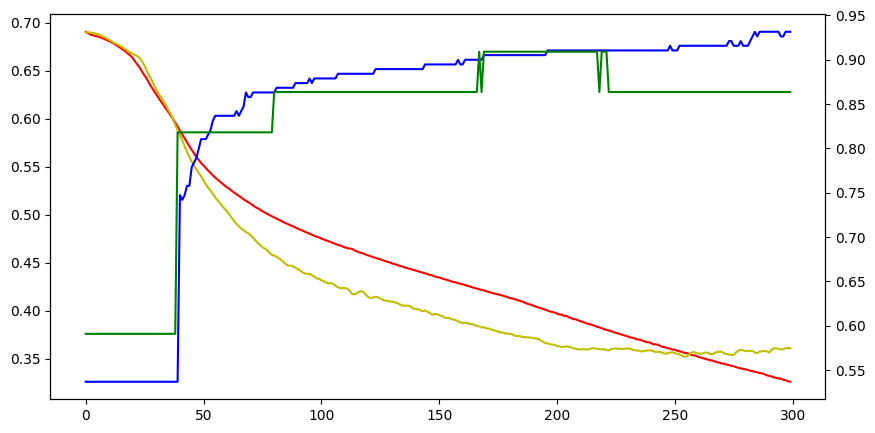

In [15]:
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r')
loss_ax.plot(hist.history['val_loss'], 'y')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax
acc_ax.plot(hist.history.get('accuracy'), 'b')
acc_ax.plot(hist.history.get('val_accuracy'), 'g')


In [16]:
y_hat = (model.predict(X_scaler.fit_transform(X_test))>0.5 ).astype(int)

3/3 [==============================] - 0s 3ms/step


In [17]:
loss, accuracy, recall,precision  = model.evaluate(X_scaler.fit_transform(X_test), y_test)
print('오차 : {}\n정확도 : {}\n재현율 : {}\n정밀도 : {}'.format(loss, accuracy,recall, precision))

3/3 [==============================] - 0s 3ms/step - loss: 0.4629 - accuracy: 0.8571 - recall: 0.8333 - precision: 0.8537
오차 : 0.46293196082115173
정확도 : 0.8571428656578064
재현율 : 0.8333333134651184
정밀도 : 0.8536585569381714


In [18]:
ctab = pd.crosstab(y_test, y_hat.reshape(-1))
ctab.index.name = '실제값'
ctab.columns.name = '예측값'
ctab

예측값,0,1
실제값,,
0.0,43,6
1.0,7,35


In [19]:
model.save('model/07_심장병발병예측모델.h5')

# 이진분류
```
1. 데이터 셋 생성 & 전처리
    엑셀 -> 데이터프레임 -> ?처리(replace('?,np.nan)) -> 결측치 처리
    -> X, y 분리 -> X변수 스케일 조정 -> train_test_split함수로 학습셋과 테스트셋 분리
2. 모델 생성(입력13, 출력1) & 학습과정 설정 & 학습
3. 모델 평가(그래프, 평가, 교차표)
4. 모델 사용(저장, 예측)
```

In [24]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [25]:
model = Sequential()
model.add(Input(shape=(13,)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                224       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 4)                 36        
                                                                 
 dense_8 (Dense)             (None, 2)                 10        
                                                                 
 dense_9 (Dense)             (None, 2)                 6         
                                                                 
Total params: 412
Trainable params: 412
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
Y_train.shape

(212, 2)

In [33]:
hist = model.fit(X_train, Y_train, epochs=300, batch_size=100, verbose=2, validation_split=0.1)

Epoch 1/300
2/2 - 1s - loss: 0.6925 - accuracy: 0.5895 - val_loss: 0.6938 - val_accuracy: 0.5000 - 622ms/epoch - 311ms/step
Epoch 2/300
2/2 - 0s - loss: 0.6916 - accuracy: 0.6316 - val_loss: 0.6933 - val_accuracy: 0.5909 - 35ms/epoch - 17ms/step
Epoch 3/300
2/2 - 0s - loss: 0.6906 - accuracy: 0.6737 - val_loss: 0.6929 - val_accuracy: 0.6364 - 35ms/epoch - 18ms/step
Epoch 4/300
2/2 - 0s - loss: 0.6894 - accuracy: 0.6947 - val_loss: 0.6923 - val_accuracy: 0.5909 - 33ms/epoch - 16ms/step
Epoch 5/300
2/2 - 0s - loss: 0.6881 - accuracy: 0.7368 - val_loss: 0.6915 - val_accuracy: 0.6364 - 32ms/epoch - 16ms/step
Epoch 6/300
2/2 - 0s - loss: 0.6867 - accuracy: 0.7474 - val_loss: 0.6906 - val_accuracy: 0.6364 - 34ms/epoch - 17ms/step
Epoch 7/300
2/2 - 0s - loss: 0.6854 - accuracy: 0.7526 - val_loss: 0.6895 - val_accuracy: 0.6364 - 30ms/epoch - 15ms/step
Epoch 8/300
2/2 - 0s - loss: 0.6840 - accuracy: 0.7579 - val_loss: 0.6884 - val_accuracy: 0.6818 - 33ms/epoch - 17ms/step
Epoch 9/300
2/2 - 0s -

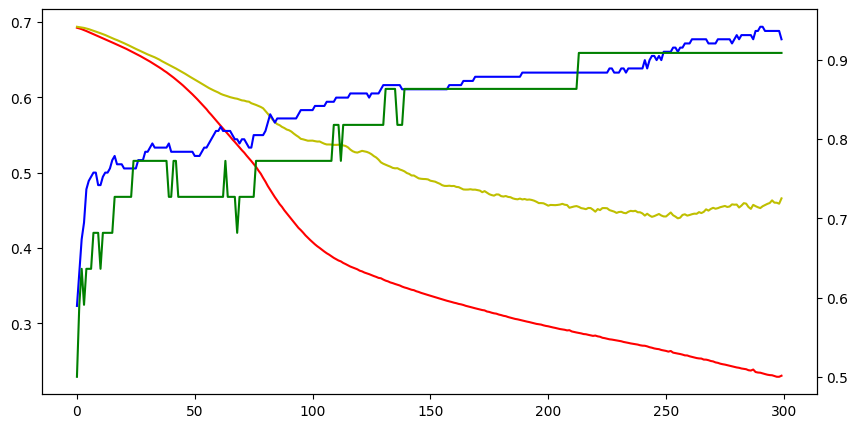

In [34]:
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r')
loss_ax.plot(hist.history['val_loss'], 'y')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax
acc_ax.plot(hist.history.get('accuracy'), 'b')
acc_ax.plot(hist.history.get('val_accuracy'), 'g')

In [37]:
y_hat = model.predict(X_scaler.fit_transform(X_test)).argmax(axis=1)
y_hat

3/3 [==============================] - 0s 3ms/step


array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0], dtype=int64)

In [39]:
loss, accuracy  = model.evaluate(X_scaler.fit_transform(X_test), Y_test)
print('오차 : {}\n정확도 : {}'.format(loss, accuracy))

3/3 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.8242
오차 : 0.43050384521484375
정확도 : 0.8241758346557617
